In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import io
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score



In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
s=requests.get(url).content
votes=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)

In [11]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [37]:
votes = votes.replace({'y':1,'n':0,'?':np.nan})

In [38]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,0.44,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.00,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.00,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


# CHALLENGE 1

In [39]:
print(votes[1].mean())
print(votes[2].mean())
print(votes[3].mean())
print(votes[4].mean())
print(votes[5].mean())
print(votes[6].mean())
print(votes[7].mean())
print(votes[8].mean())
print(votes[9].mean())
print(votes[10].mean())
print(votes[11].mean())
print(votes[12].mean())
print(votes[13].mean())
print(votes[14].mean())
print(votes[15].mean())
print(votes[16].mean())

0.44202298850574706
0.5038759689922481
0.5966981132075472
0.41745283018867924
0.5047619047619047
0.6415094339622641
0.5676959619952494
0.5761904761904761
0.5012106537530266
0.5046728971962616
0.36231884057971014
0.42326732673267325
0.5097560975609756
0.5933014354066986
0.4275184275184275
0.8126888217522659


In [42]:
votes[1].fillna(0.44, inplace=True)
votes[2].fillna(0.503, inplace=True)
votes[3].fillna(0.596, inplace=True)
votes[4].fillna(0.417, inplace=True)
votes[5].fillna(0.504, inplace=True)
votes[6].fillna(0.641, inplace=True)
votes[7].fillna(0.567, inplace=True)
votes[8].fillna(0.576, inplace=True)
votes[9].fillna(0.501, inplace=True)
votes[10].fillna(0.504, inplace=True)
votes[11].fillna(0.362, inplace=True)
votes[12].fillna(0.423, inplace=True)
votes[13].fillna(0.509, inplace=True)
votes[14].fillna(0.593, inplace=True)
votes[15].fillna(0.427, inplace=True)
votes[16].fillna(0.812, inplace=True)

In [43]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00,1.0,0.0,1.000,1.000,1.0,0.0,0.0,0.0,1.0,0.362,1.000,1.0,1.0,0.0,1.000
1,republican,0.00,1.0,0.0,1.000,1.000,1.0,0.0,0.0,0.0,0.0,0.000,1.000,1.0,1.0,0.0,0.812
2,democrat,0.44,1.0,1.0,0.417,1.000,1.0,0.0,0.0,0.0,0.0,1.000,0.000,1.0,1.0,0.0,0.000
3,democrat,0.00,1.0,1.0,0.000,0.504,1.0,0.0,0.0,0.0,0.0,1.000,0.000,1.0,0.0,0.0,1.000
4,democrat,1.00,1.0,1.0,0.000,1.000,1.0,0.0,0.0,0.0,0.0,1.000,0.423,1.0,1.0,1.0,1.000


# CHALLENGE 2

In [113]:
X, y = votes.drop(columns=[0]), votes[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) #hold out 20% of the data for final testing

# CHALLENGE 3

In [88]:
knn_accuracies = []
def calculate_highest_knn_accuracy(X_train, X_test, y_train, y_test):
    highest_accuracy = 0
    highest_accuracy_index = 0
    for i in range (1, 21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        knn_accuracies.append(accuracy)
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            highest_accuracy_index = i
    return (highest_accuracy_index, highest_accuracy)
        

In [89]:
knn_tuple = calculate_highest_knn_accuracy(X_train, X_test, y_train, y_test)
print("Highest accuracy measured: " + str(knn_tuple[1]) + " with " + str(knn_tuple[0]) + " neighbors")

Highest accuracy measured: 0.9312977099236641 with 6 neighbors


# CHALLENGE 4

In [90]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
lm1.score(X_test, y_test)

0.9312977099236641

# CHALLENGE 5

In [92]:
votes[0].value_counts()

democrat      267
republican    168
Name: 0, dtype: int64

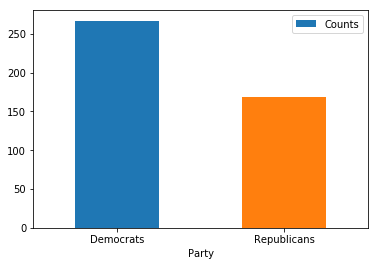

In [93]:
plot_df = pd.DataFrame({"Party" : ["Democrats", "Republicans"], "Counts": [267, 168] })
ax = plot_df.plot.bar(x='Party', y='Counts', rot=0)

In [94]:
manual_predictor_df = pd.DataFrame(votes[0])

In [95]:
manual_predictor_df["predicted_demo"] = "democrat"
manual_predictor_df["predicted_repub"] = "republican"

In [96]:
manual_predictor_df.head()

,0,predicted_demo,predicted_repub
0,republican,democrat,republican
1,republican,democrat,republican
2,democrat,democrat,republican
3,democrat,democrat,republican
4,democrat,democrat,republican


In [97]:
print('democrats accuracy: ',metrics.accuracy_score(manual_predictor_df[0], manual_predictor_df['predicted_demo']))
print('republican accuracy: ',metrics.accuracy_score(manual_predictor_df[0], manual_predictor_df['predicted_repub']))



democrats accuracy:  0.6137931034482759
republican accuracy:  0.38620689655172413


# CHALLENGE 6

In [98]:
plt.

[0.9007633587786259,
 0.8931297709923665,
 0.9007633587786259,
 0.9007633587786259,
 0.916030534351145,
 0.9312977099236641,
 0.916030534351145,
 0.9236641221374046,
 0.9312977099236641,
 0.9312977099236641,
 0.9236641221374046,
 0.9236641221374046,
 0.9236641221374046,
 0.9236641221374046,
 0.9236641221374046,
 0.9236641221374046,
 0.9236641221374046,
 0.916030534351145,
 0.916030534351145,
 0.916030534351145]

In [99]:
knn_plot_df = pd.DataFrame({"K Values" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], "Accuracies": knn_accuracies })

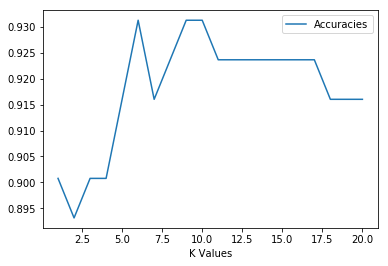

In [103]:
knn_plot_df.plot(x = "K Values", y = "Accuracies")

# CHALLENGE 7

In [117]:
estimator = LogisticRegression()
n_samples = X_train.shape[0]
train_scores, test_scores = [], []
for n in range(10, 10, n_samples):
    estimator.fit(X_train[:n], y_train[n])
    train_scores.append(estimator.score(X_train[:n], y_train[n]))
    test_scores.append(estimator.score(X_test, y_test))
# plt(range(10, 10, n_samples), train_scores)
# plt(range(10, 10, n_samples), test_scores)

In [119]:
train_sizes_abs, train_scores, test_scores = \
    learning_curve(estimator, X, y,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=5, scoring=None,
                   exploit_incremental_learning=False,
                   n_jobs=1, pre_dispatch="all", verbose=0)


In [131]:
train_cv_err = np.mean(train_scores, axis = 1)
test_cv_err = np.mean(test_scores, axis = 1)

Text(0.5,0,'Train sizes')

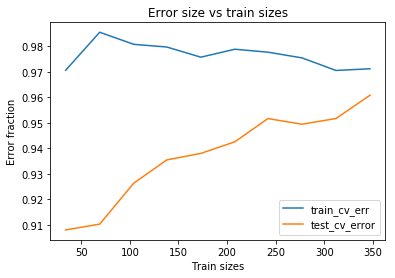

In [136]:
df = pd.DataFrame({
    'train_cv_err': train_cv_err,
    'test_cv_error': test_cv_err}, 
    index=train_sizes_abs)
lines = df.plot.line()
plt.title("Error size vs train sizes")
plt.ylabel("Error fraction")
plt.xlabel("Train sizes")


In [137]:
estimator2 = KNeighborsClassifier(n_neighbors=6)
n_samples2 = X_train.shape[0]
train_scores2, test_scores2 = [], []
for n in range(10, 10, n_samples):
    estimator2.fit(X_train[:n], y_train[n])
    train_scores2.append(estimator2.score(X_train[:n], y_train[n]))
    test_scores2.append(estimator2.score(X_test, y_test))


In [138]:
train_sizes_abs2, train_scores2, test_scores2 = \
    learning_curve(estimator2, X, y,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=5, scoring=None,
                   exploit_incremental_learning=False,
                   n_jobs=1, pre_dispatch="all", verbose=0)

In [139]:
train_cv_err2 = np.mean(train_scores2, axis = 1)
test_cv_err2 = np.mean(test_scores2, axis = 1)

Text(0.5,0,'Train sizes')

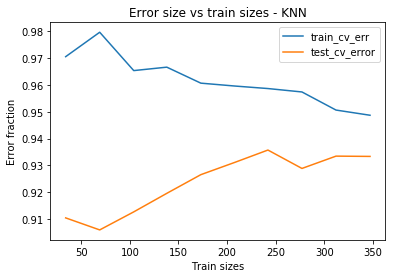

In [141]:

df = pd.DataFrame({
    'train_cv_err': train_cv_err2,
    'test_cv_error': test_cv_err2}, 
    index=train_sizes_abs2)
lines = df.plot.line()
plt.title("Error size vs train sizes - KNN")
plt.ylabel("Error fraction")
plt.xlabel("Train sizes")

# CHALLENGE 8

In [142]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [145]:
nb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [149]:
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Naive Bayes accuracy: ")
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

Naive Bayes accuracy: 
0.9389312977099237


In [150]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Support vector machine accuracy: ")
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

Support vector machine accuracy: 
0.9541984732824428


In [151]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("decision tree accuracy: ")
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

decision tree accuracy: 
0.9389312977099237


In [152]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random forest accuracy: ")
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

Random forest accuracy: 
0.9618320610687023


# CHALLENGE 9

In [158]:
print("Cross val score for NB: ")
cross_val_score(nb, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for NB: 


0.9401442249277053

In [159]:
print("Cross val score for SVC: ")
cross_val_score(svc, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for SVC: 


0.953965274233919

In [160]:
print("Cross val score for decision tree: ")
cross_val_score(dtc, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for decision tree: 


0.940090763286433

In [161]:
print("Cross val score for random forest: ")
cross_val_score(rfc, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for random forest: 


0.9608624334767077

# CHALLENGE 10

In [162]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
s=requests.get(url).content
votes_new=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)

In [166]:
votes_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [167]:
votes_new = votes_new.replace({'y':1,'n':0,'?':np.nan})

In [169]:
print(votes_new[1].mode())
print(votes_new[2].mode())
print(votes_new[3].mode())
print(votes_new[4].mode())
print(votes_new[5].mode())
print(votes_new[6].mode())
print(votes_new[7].mode())
print(votes_new[8].mode())
print(votes_new[9].mode())
print(votes_new[10].mode())
print(votes_new[11].mode())
print(votes_new[12].mode())
print(votes_new[13].mode())
print(votes_new[14].mode())
print(votes_new[15].mode())
print(votes_new[16].mode())

0    0.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64


In [170]:
votes_new[1].fillna(0.0, inplace=True)
votes_new[2].fillna(1.0, inplace=True)
votes_new[3].fillna(1.0, inplace=True)
votes_new[4].fillna(0.0, inplace=True)
votes_new[5].fillna(1.0, inplace=True)
votes_new[6].fillna(1.0, inplace=True)
votes_new[7].fillna(1.0, inplace=True)
votes_new[8].fillna(1.0, inplace=True)
votes_new[9].fillna(1.0, inplace=True)
votes_new[10].fillna(1.0, inplace=True)
votes_new[11].fillna(0.0, inplace=True)
votes_new[12].fillna(0.0, inplace=True)
votes_new[13].fillna(1.0, inplace=True)
votes_new[14].fillna(1.0, inplace=True)
votes_new[15].fillna(0.0, inplace=True)
votes_new[16].fillna(1.0, inplace=True)

In [176]:
X, y = votes_new.drop(columns=[0, 16]), votes_new[16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) #hold out 20% of the data for final testing

In [177]:
print("Cross val score for NB: ")
cross_val_score(nb, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for NB: 


0.7725741780272654

In [178]:
print("Cross val score for SVC: ")
cross_val_score(svc, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for SVC: 


0.857508930524167

In [179]:
print("Cross val score for decision tree: ")
cross_val_score(dtc, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for decision tree: 


0.802620227940998

In [180]:
print("Cross val score for random forest: ")
cross_val_score(rfc, X, y, cv = 5, scoring='accuracy').mean()

Cross val score for random forest: 


0.8184764647274673

# CHALLENGE 11

In [310]:
df = pd.read_csv('2013_movies.csv')
df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [311]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [312]:
grouped_df = df.groupby(['Rating']).count().reset_index()

In [313]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
Rating                4 non-null object
Title                 4 non-null int64
Budget                4 non-null int64
DomesticTotalGross    4 non-null int64
Director              4 non-null int64
Runtime               4 non-null int64
ReleaseDate           4 non-null int64
dtypes: int64(6), object(1)
memory usage: 304.0+ bytes


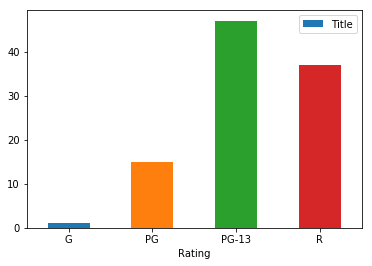

In [314]:
grouped_df.plot.bar(x='Rating', y='Title', rot=0)

In [268]:
X, y = df.drop(columns=['Title', 'Director', 'Rating', 'ReleaseDate']), df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) #hold out 20% of the data for final testing

In [315]:
calculate_highest_knn_accuracy(X_train, X_test, y_train, y_test)

(12, 0.8260869565217391)

In [316]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
y_pred = knn.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
accuracy

0.7875816993464052

In [318]:
lm1.fit(X, y)
y_pred = lm1.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
accuracy

0.7483660130718954

In [247]:
df["Predicted"] = "PG-13"

In [257]:
accuracy2 = metrics.accuracy_score(y, df['Predicted'])
accuracy2

0.47

In [258]:
lm1.coef_

array([[-4.73607165e-08, -2.67922080e-13],
       [-1.03876992e-08, -4.22409750e-14],
       [ 4.71945999e-10, -7.22558926e-16],
       [-7.03183167e-09, -1.25224250e-15]])

Knn & logistic regression do a lot better job than the naive predictor

# CHALLENGE 12

In [278]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
s=requests.get(url).content
cancer=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)

In [280]:
cancer.rename(index=str, columns={0: "Age", 1: "Year_of_op", 2: "Num_axilliary_nodes" , 3: "Survived_or_not" }, inplace=True)


In [281]:
cancer.columns

Index(['Age', 'Year_of_op', 'Num_axilliary_nodes', 'Survived_or_not'], dtype='object')

In [283]:
cancer.head()

,Age,Year_of_op,Num_axilliary_nodes,Survived_or_not
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [282]:
cancer['Age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [286]:
cancer.loc[cancer['Survived_or_not'] == 1]['Age'].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [288]:
cancer.loc[cancer['Survived_or_not'] == 2]['Age'].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: Age, dtype: float64

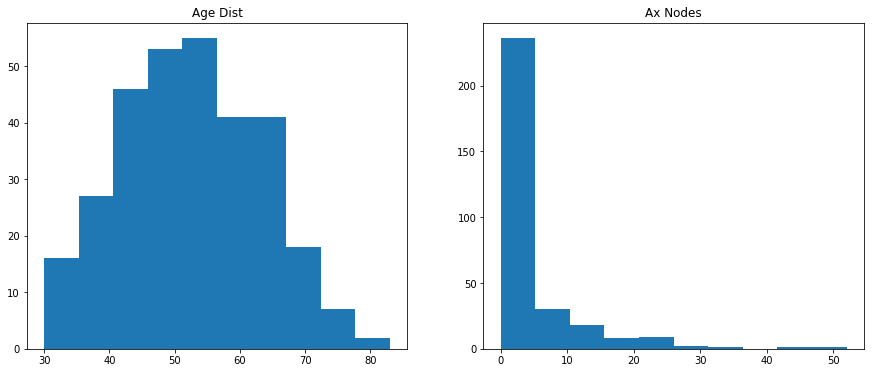

In [291]:
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.title('Age Dist')
plt.hist(cancer["Age"])

plt.subplot(1,2,2)
plt.title('Ax Nodes')
plt.hist(cancer["Num_axilliary_nodes"]);

In [302]:
cancer["Year_of_op"].sort_values().head(1)
## Earliest year of surgery is 1958

305    58
Name: Year_of_op, dtype: int64

In [303]:
cancer["Year_of_op"].sort_values(ascending=False).head(1)
## Latest year of surgery is 1969

90    69
Name: Year_of_op, dtype: int64

In [304]:
X, y = cancer.drop(columns=['Survived_or_not']), cancer['Survived_or_not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) #hold out 20% of the data for final testing

In [305]:
lm1.fit(X, y)
y_pred = lm1.predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
accuracy

0.7483660130718954

In [306]:
lm1.coef_

array([[ 0.0196353 , -0.01492241,  0.08833122]])

as age & num of aux nodes increase, survival goes down. as year of op goes up, survival goes up. These just slightly affect the outcome as seen by the magnitude of the coefficients. 

In [307]:
train_sizes_abs2, train_scores2, test_scores2 = \
    learning_curve(lm1, X, y,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=5, scoring=None,
                   exploit_incremental_learning=False,
                   n_jobs=1, pre_dispatch="all", verbose=0)

Text(0.5,0,'Train sizes')

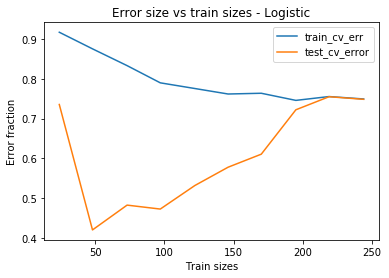

In [309]:
train_cv_err2 = np.mean(train_scores2, axis = 1)
test_cv_err2 = np.mean(test_scores2, axis = 1)
df = pd.DataFrame({
    'train_cv_err': train_cv_err2,
    'test_cv_error': test_cv_err2}, 
    index=train_sizes_abs2)
lines = df.plot.line()
plt.title("Error size vs train sizes - Logistic")
plt.ylabel("Error fraction")
plt.xlabel("Train sizes")